In [50]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import os

DATA_DIR = "/content/drive/MyDrive/3RD_SEM_PROJ/image/images"
folders = os.listdir(DATA_DIR)
print(folders)


['9', '18', '5', '14', '4', '0', '3', '13', '11', '2', '7', '15', '6', '8', '10', '16', '1', '17', '12']


In [52]:
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

In [53]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [54]:
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


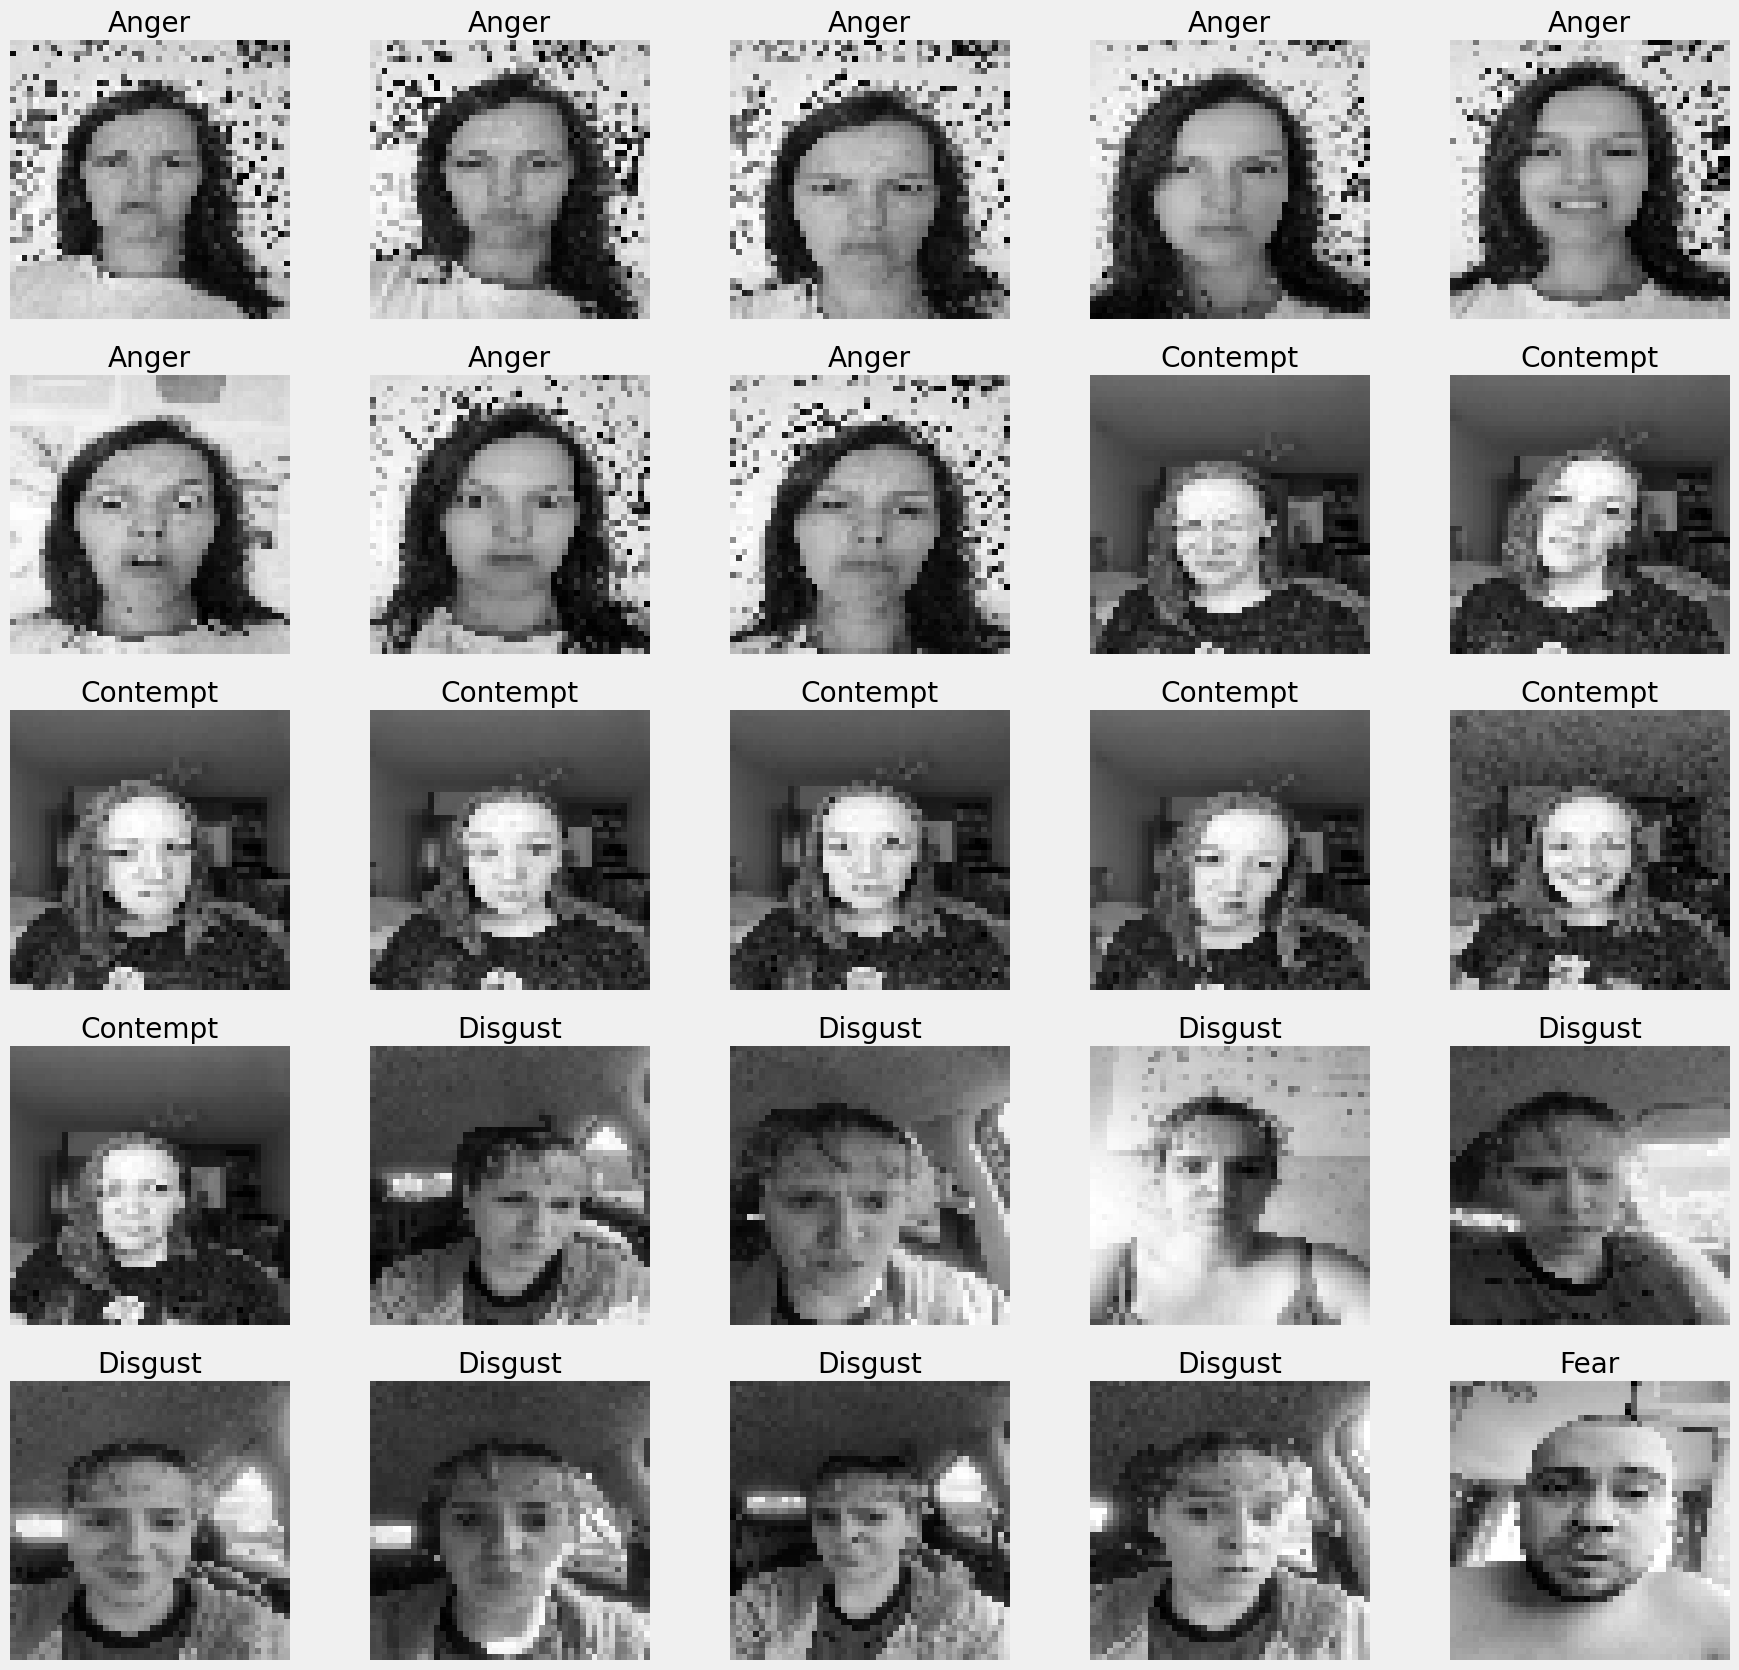

In [55]:
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

In [56]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [57]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(len(EMOTIONS), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,384 (1.85 MB)

 Trainable params: 485,384 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - accuracy: 0.1436 - loss: 2.0870 - val_accuracy: 0.1538 - val_loss: 2.0766
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.2315 - loss: 2.0255 - val_accuracy: 0.1538 - val_loss: 2.0781
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.1097 - loss: 2.0855 - val_accuracy: 0.3077 - val_loss: 2.0256
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.1527 - loss: 2.0198 - val_accuracy: 0.2308 - val_loss: 1.9856
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.1613 - loss: 1.9958 - val_accuracy: 0.3077 - val_loss: 1.9515
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.2446 - loss: 1.9803 - val_accuracy: 0.3846 - val_loss: 1.9170
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.2271 - loss: 1.9381 - val_accuracy: 0.3846 - val_loss: 1.8530
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.2298 - loss: 1.9637 - val_accuracy: 0.5385 - val_loss:

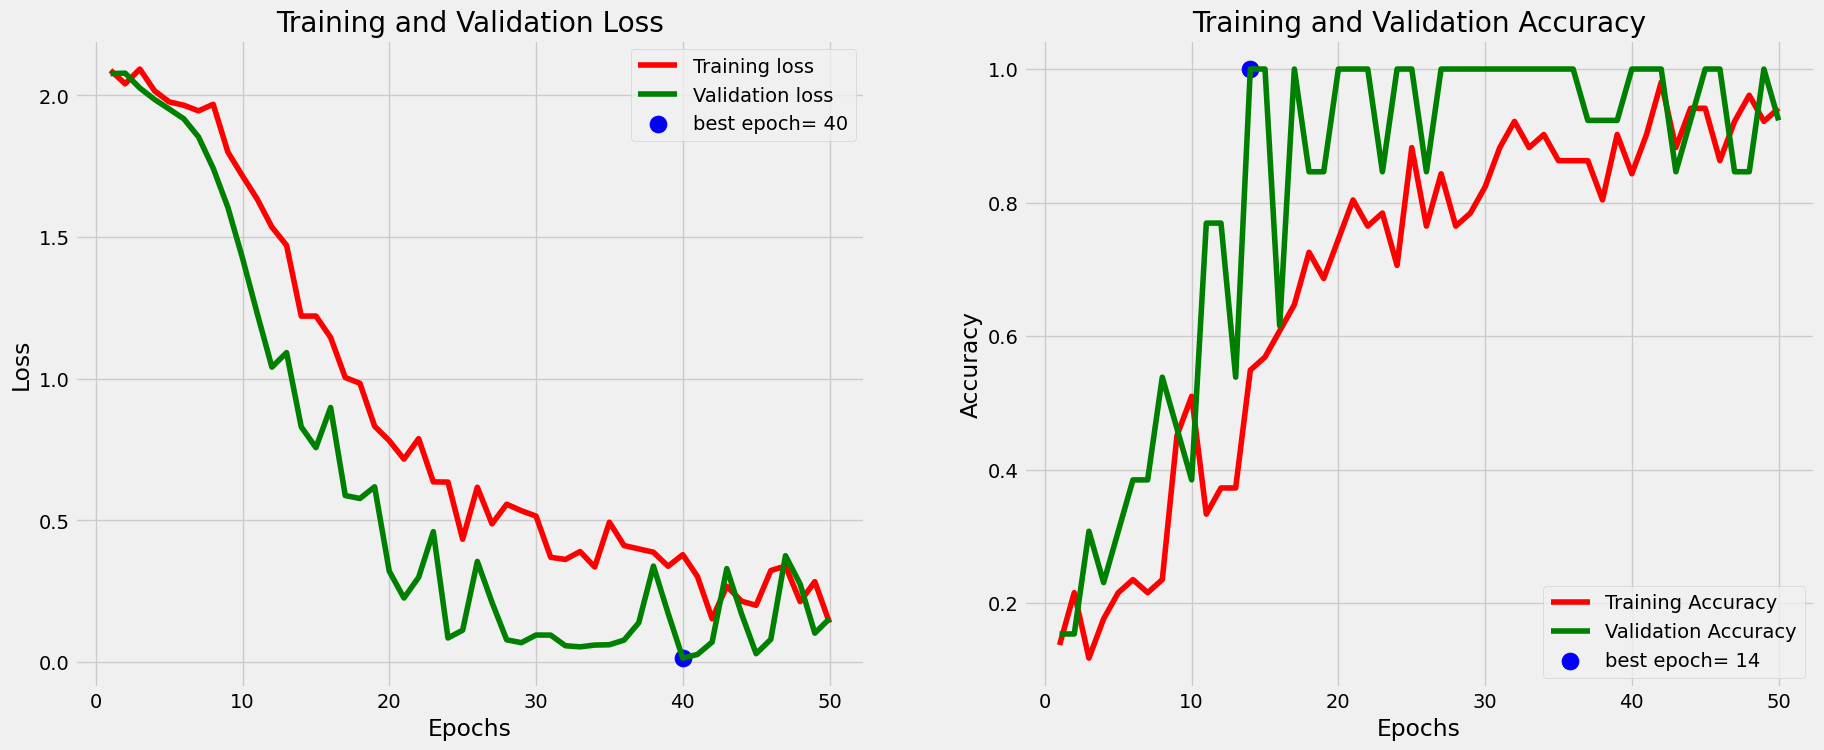

In [62]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [63]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 - 0s - 75ms/step - accuracy: 0.9231 - loss: 0.1536
Test Loss: 0.15362438559532166
Test Accuracy: 0.9230769276618958


In [64]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels, target_names=EMOTIONS))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
     Disgust       1.00      1.00      1.00         1
        Fear       0.50      1.00      0.67         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      0.50      0.67         2
         Sad       1.00      1.00      1.00         1
   Surprised       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.94      0.94      0.92        13
weighted avg       0.96      0.92      0.92        13



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


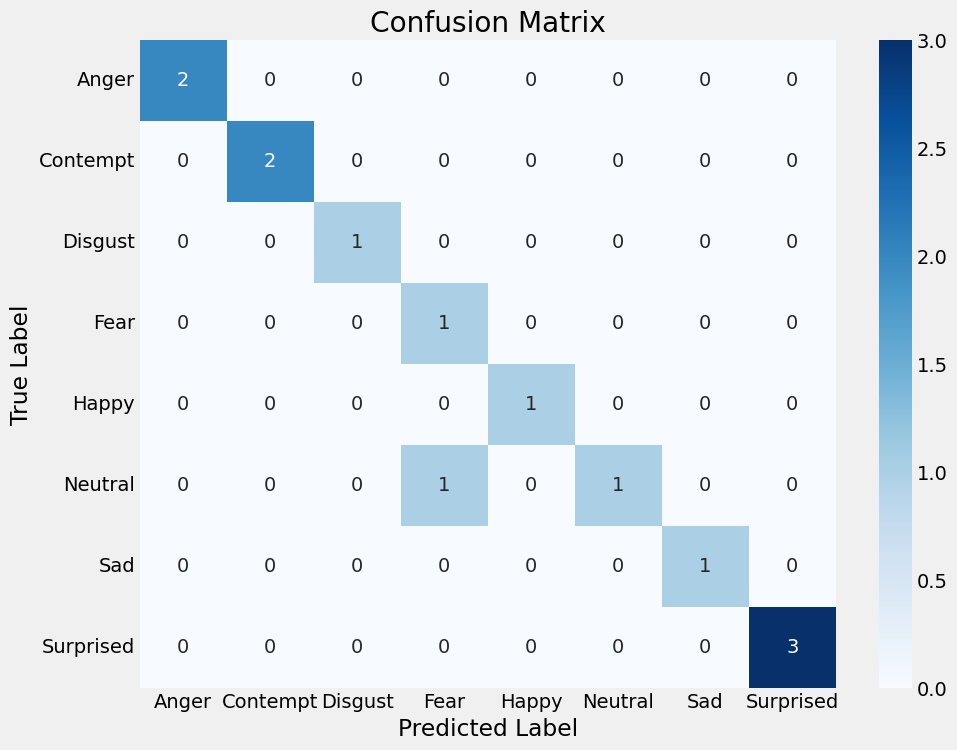

In [66]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


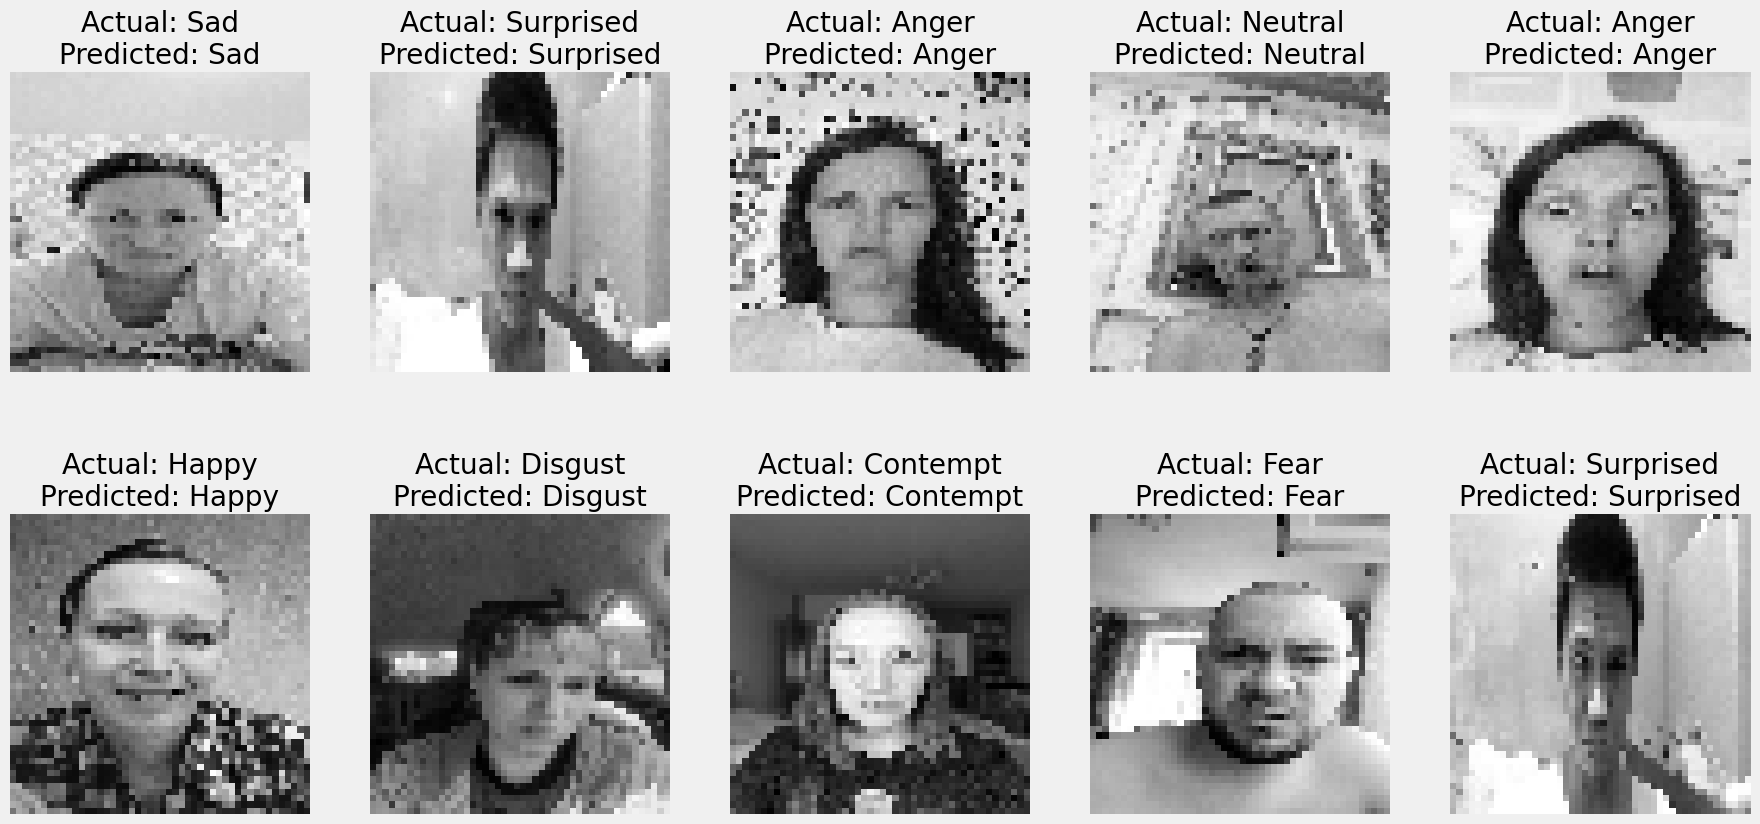

In [67]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Function to display images with predicted and actual labels
def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        # Since the images are grayscale, we reshape them to (48, 48)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the images with predicted and actual labels
display_images(X_test, y_test, predicted_labels, EMOTIONS)